In [1]:
import osnap

/home/acald013/opt/miniconda3/envs/osnap/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/acald013/opt/miniconda3/envs/osnap/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/acald013/opt/miniconda3/envs/osnap/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [2]:
sample = "/home/acald013/Datasets/LTDB_Std_All_Sample.zip"
full = "/home/acald013/Datasets/LTDB_Std_All_fullcount.zip"

osnap.data.read_ltdb(sample=sample, fullcount=full)

/home/acald013/opt/miniconda3/envs/osnap/lib/python3.7/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


In [3]:
osnap.data.db.ltdb.head()

,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,n_native_over_60,...,n_white_persons,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled
geoid,,,,,,,,,,,,,,,,,,,,,
01001020500,NaN,1.121662,NaN,NaN,1.802740,3.284181,NaN,0.301098,NaN,NaN,...,5.794934,1970,2.166366,NaN,6.433142,3.514090,NaN,NaN,NaN,4.737847
01003010100,NaN,609.000000,NaN,NaN,639.000000,1407.000000,NaN,221.000000,NaN,NaN,...,2003.999981,1970,1106.000000,NaN,8.299712,6.368876,NaN,NaN,NaN,5.821326
01003010200,NaN,37.567365,NaN,NaN,564.014945,686.748041,NaN,27.861793,NaN,NaN,...,1757.910752,1970,619.433984,NaN,13.313281,1.480888,NaN,NaN,NaN,6.248800
01003010300,NaN,374.853457,NaN,NaN,981.543199,1523.971872,NaN,103.848314,NaN,NaN,...,2835.404427,1970,1025.805309,NaN,8.023381,2.788906,NaN,NaN,NaN,7.214156
01003010400,NaN,113.203816,NaN,NaN,796.944763,1029.919527,NaN,37.127235,NaN,NaN,...,2323.133371,1970,780.370269,NaN,11.072073,1.427952,NaN,NaN,NaN,11.205555


In [4]:
df = osnap.data.db.ltdb[['n_total_pop', 'year']]
#df['geoid'] = osnap.data.db.ltdb.index
#df['geoid'] = df['geoid'].astype(object)
df.head()

,n_total_pop,year
geoid,,
01001020500,8.568306,1970
01003010100,3469.999968,1970
01003010200,1881.424759,1970
01003010300,3723.622031,1970
01003010400,2600.033045,1970


In [5]:
df_pop_2000 = df[(df['year'] == 2000)][['n_total_pop']]
df_pop_2000.head()

,n_total_pop
geoid,
01001020100,1920.974695
01001020200,1892.000000
01001020300,3339.000000
01001020400,4556.000000
01001020500,6053.912288


In [6]:
import pickle
import pandas as pd

In [7]:
# This file can be download here: https://drive.google.com/open?id=1gWF0OCn6xuR_WrEj7Ot2jY6KI2t6taIm
with open('/home/acald013/Datasets/tracts_US.pkl', 'rb') as input: 
    map_gpd = pickle.load(input)

#df = census_2010.loc[(census_2010.state == "PA")]

map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])
gdf_2000 = map_gpd.merge(df_pop_2000, left_on = 'GEOID10', right_on = 'geoid')

In [8]:
gdf_2000.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,COUNTY_ID,county_id2,COUNTYNS10,NAME10_COU,GEOID_MSA,NAME_MSA,STATES_MSA,geometry,INTGEOID10,n_total_pop
0,01,001,020801,01001020801,208.01,01001,1001,161526,Autauga,33860,Montgomery,AL,"POLYGON ((-86.456273 32.405837, -86.4570349999...",1001020801,1886.000065
1,01,001,020802,01001020802,208.02,01001,1001,161526,Autauga,33860,Montgomery,AL,"POLYGON ((-86.412497 32.589422, -86.412442 32....",1001020802,7577.025269
2,01,001,020200,01001020200,202,01001,1001,161526,Autauga,33860,Montgomery,AL,"POLYGON ((-86.467354 32.459308, -86.46764 32.4...",1001020200,1892.000000
3,01,001,020700,01001020700,207,01001,1001,161526,Autauga,33860,Montgomery,AL,"POLYGON ((-86.46106999999999 32.42709, -86.461...",1001020700,2900.000000
4,01,001,020600,01001020600,206,01001,1001,161526,Autauga,33860,Montgomery,AL,"POLYGON ((-86.470524 32.456117, -86.4700469999...",1001020600,3271.999978


In [9]:
import geopandas as gpd
from quilt.data.spatialucr import census
from shapely.wkb import loads

In [10]:
df = census.tracts_1990()
df['geometry'] = df.wkb.apply(lambda x: loads(x, hex=True))
gdf_1990 = gpd.GeoDataFrame(df)

/home/acald013/opt/miniconda3/envs/osnap/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/acald013/opt/miniconda3/envs/osnap/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/acald013/opt/miniconda3/envs/osnap/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


72693

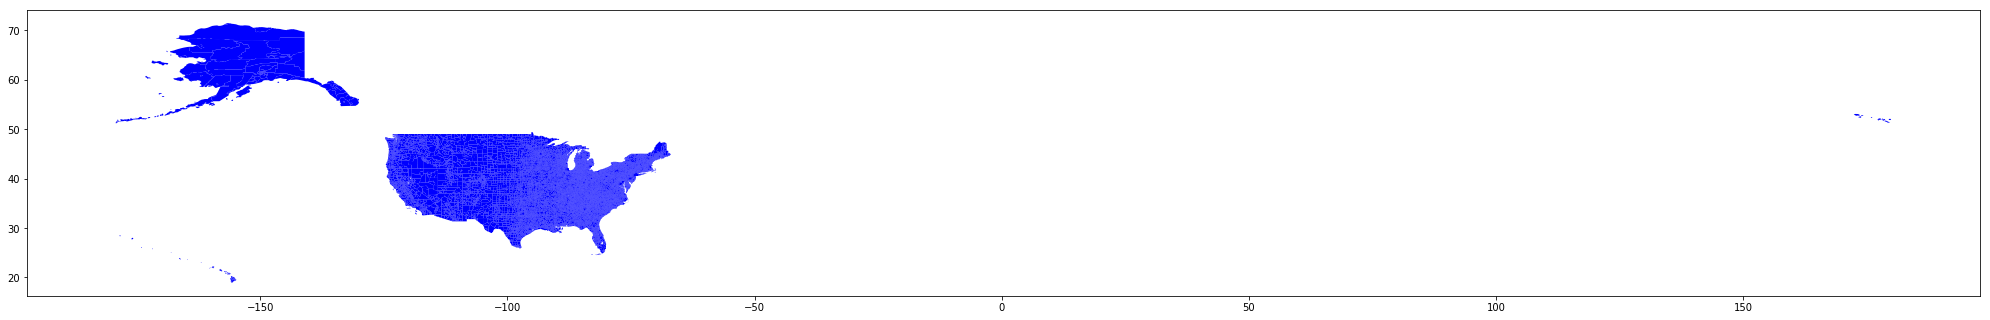

In [11]:
gdf_2000.plot(figsize = (35, 35), color='blue')
len(gdf_2000)

61332

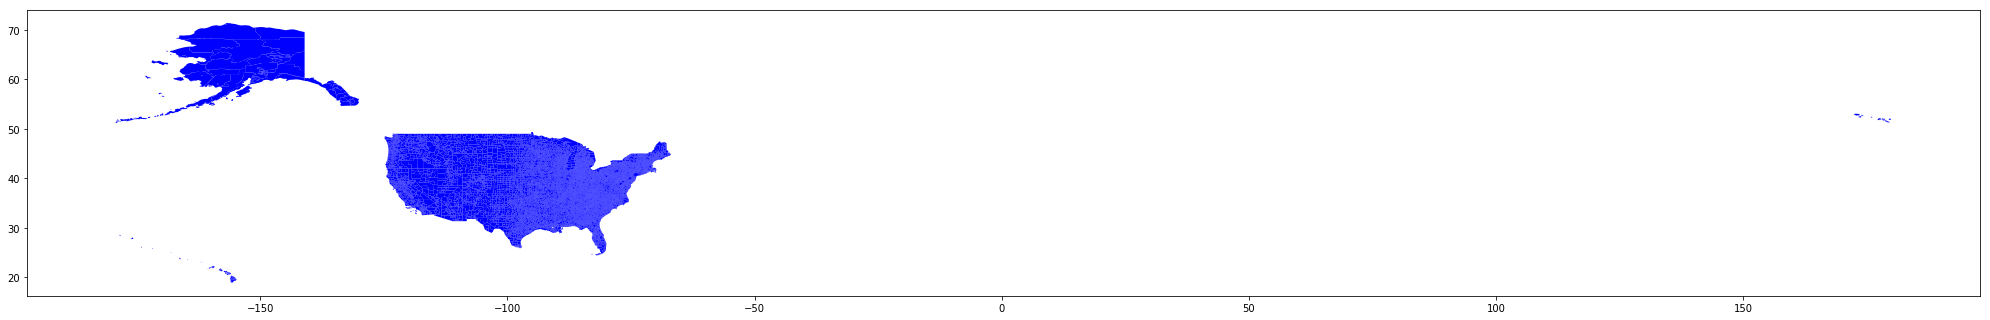

In [17]:
gdf_1990.plot(figsize = (35, 35), color='red')
len(gdf_1990)

In [19]:
gdf_2000.to_file("/home/acald013/Datasets/gdf_2000")
gdf_1990.to_file("/home/acald013/Datasets/gdf_1990")

In [ ]:
# Really time consuming! Specially because of the inner overlay of the maps.
resulting_table = area_tables(full_pop_2000, df_1990)

In [ ]:
# In other words, it's unfeasible to run this:
# len(gpd.overlay(full_pop_2000, df_1990, how='union'))